# Introduction to scikit-learn classification for single cell data

## 1. Let's start by installing all required libraries

In [69]:
!pip install numpy scikit_learn matplotlib pandas -q

## 2. Loading a data set

For loading the dataset we will be using a library called [pandas](https://pandas.pydata.org/).
This libraries allows the loading of multiple file formats for tabular data, including _.xls_, _.xlsx_, _.csv_ and many more.
We will be using the [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) method to load the data.
```python
import pandas as pd

data = pd.read_csv("path/to/data")
```

Let's use it to load the `morphological_measurements.csv` in the data folder of this repository.

In [1]:
# your code here
import pandas as pd
data = pd.read_csv('../data/morphological_measurements.csv')

## 3. Take a look at the data

`pandas` provides several easy ways to visualize the data.
You can just print the dataframe to take a look at it:
```python
print(data)
```
or since we are using jupyter lab we can just execute a cell with the variable name `data`

In [2]:
# your code here
data

,Cell ID,Area,Perimeter,Length,Width,Eccentricity,Irregularity,Cell Cycle Phase
0,1,182,57,16.000000,13.000000,0.582961,4.225121,1
1,2,211,64,16.552945,15.231546,0.391516,4.405942,1
2,3,237,67,18.027756,14.866069,0.565685,4.352118,1
3,4,227,66,17.000000,16.000000,0.337915,4.380574,1
4,5,204,60,15.000000,15.000000,0.000000,4.200840,1
...,...,...,...,...,...,...,...,...
529,530,389,85,24.351591,20.248457,0.555518,4.309671,1
530,531,420,87,23.000000,21.000000,0.407862,4.245165,2
531,532,450,91,25.961510,20.615528,0.607813,4.289781,3
532,533,424,89,25.495098,21.213203,0.554700,4.322222,3


if you want to take a look at just the columns names and first few rows you can do so by:   
```python
data.head(n_rows) # default value is 5
```

In [4]:
# your code here
data.head(10)

,Cell ID,Area,Perimeter,Length,Width,Eccentricity,Irregularity,Cell Cycle Phase
0,1,182,57,16.000000,13.000000,0.582961,4.225121,1
1,2,211,64,16.552945,15.231546,0.391516,4.405942,1
2,3,237,67,18.027756,14.866069,0.565685,4.352118,1
3,4,227,66,17.000000,16.000000,0.337915,4.380574,1
4,5,204,60,15.000000,15.000000,0.000000,4.200840,1
5,6,217,66,17.204651,15.000000,0.489760,4.480372,1
6,7,239,66,18.027756,16.155494,0.443760,4.269185,1
7,8,239,66,17.691806,15.556349,0.476274,4.269185,1
8,9,263,69,20.615528,16.401219,0.605854,4.254722,2
9,10,263,72,18.027756,17.088007,0.318651,4.439710,1


`pandas` also contains an amazing integration of `matplotlib` plots.
To plot data we can simply do:   
```python
data.plot() # plots all columns
data[["column_name_1", "column_name_2"]].plot() # plots just the defined columns
data["column_name_1"].hist() # creates an histogram of column_name_1
```

Try to plot all the data:


<Axes: >

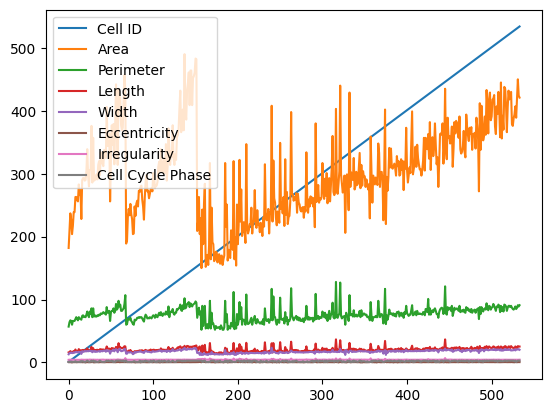

In [5]:
# your code here
data.plot()

plot just the area and perimeter:

<Axes: >

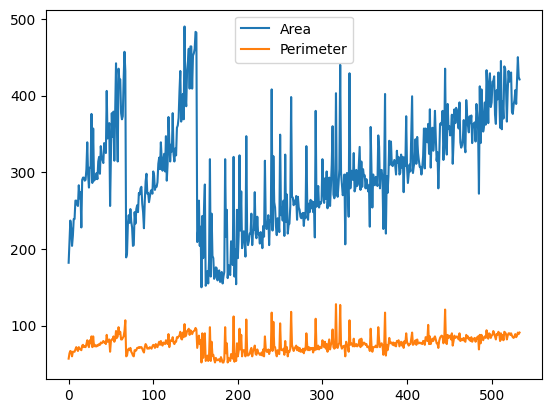

In [6]:
# your code here
data[["Area", "Perimeter"]].plot()

create an histogram of cell cycle phases

<Axes: >

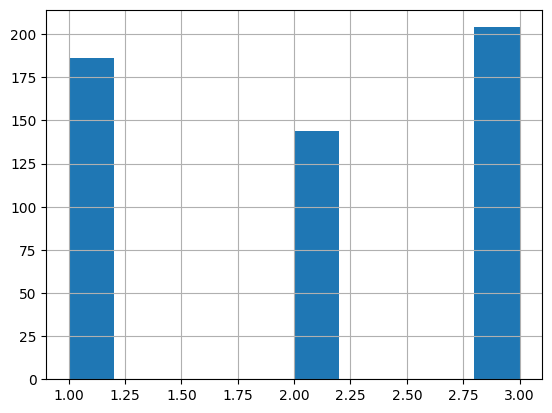

In [7]:
# your code here
data['Cell Cycle Phase'].hist()

__Bonus__:

You can also create scatter plots using `pandas`, however, the code needs to change slightly to define the features to plot.

You can do it like this:
```python
data.plot.scatter(x="feature 1", y="feature 2")
```

try it out with the `area` and `perimeter`

<Axes: xlabel='Area', ylabel='Perimeter'>

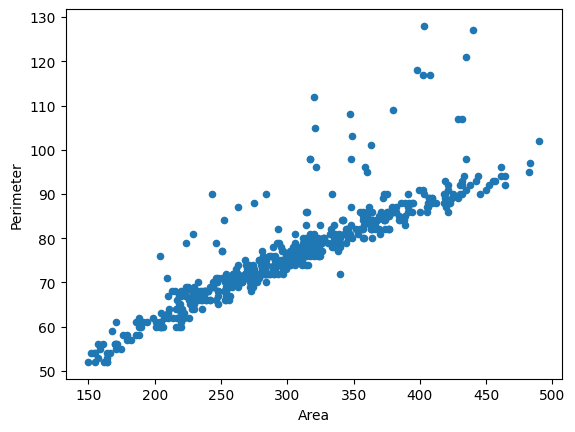

In [15]:
# your code here
data.plot.scatter(x='Area', y='Perimeter')

## 4. Using machine learning to automatically classify cell cycle phase

In this exercise we will use machine learning to classifiy _S. aureus_ cells into different cell cycle phases.

_S. aureus_ cells can be classified in three different phases: 
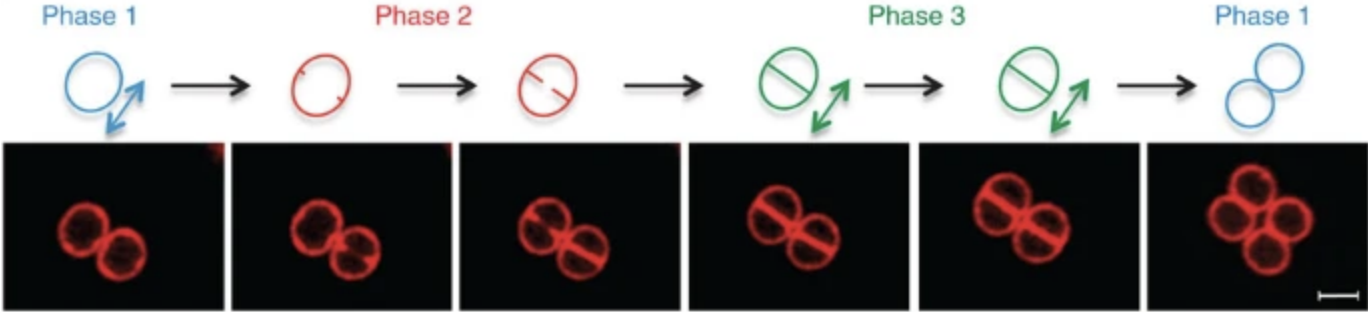

Phase 1 cells start more roundish and, as they go over their cell cycle, they will elongate and increase in size.

---

The dataset we have just loaded contains a column of manually annotated cell cycle phases.  
Let's try to build a classifier capable of automatically classifying cells based on their morphological measurements


__BUT FIRST__, we need to preprocess our data.  
As we did for intensity values we need to normalize all the values to make sure they are in similar range.

For this we are going to build our own custom function that normalizes all values (except the cell cycle classification) to mean _0_ and standard deviation of _1_ (also known as the Z-scores or Standardization).
This can be achieved by subtracting the mean ($\mu$) to each value and then dividing by the standard deviation ($\sigma$).

The formula is: 

$ x_{norm} = \frac{x - \mu}{\sigma} $

Lets create our own normalization by Z-scores function.

In [18]:
# your code here
def normalize_column(data_column):

    mean = data_column.mean()

    std = data_column.std()

    normalized_column = (data_column - mean) / std

    return normalized_column

Let's create a copy of our dataset to keep the original values and use the newly created function to normalized all columns except Cell Cycle Phase.

You can copy it with as `data.copy()`.

Step-by-step:
1. copy the dataframe
1. create an array with the column names
    - _Hint_: is there another way of getting our column names without the last one?
1. iterate over the column names to normalize the data

In [26]:
# your code here
normalized_data = data.copy()
cols = ['Area', 'Perimeter', 'Length', 'Width', 'Eccentricity','Irregularity']

for col in cols:
    normalized_data[col] = normalize_column(data[col])

__Bonus__:

get the column names from `pandas` directly and exclude the columns which should not be normalized ("Cell ID" and "Cell Cycle Phase")

In [ ]:
# your code here
normalized_data = data.copy()
cols = data.columns[1:-1]

for col in cols:
    normalized_data[col] = normalize_column(data[col])

Try plotting the Area and Eccentricity to see how it changed

<Axes: >

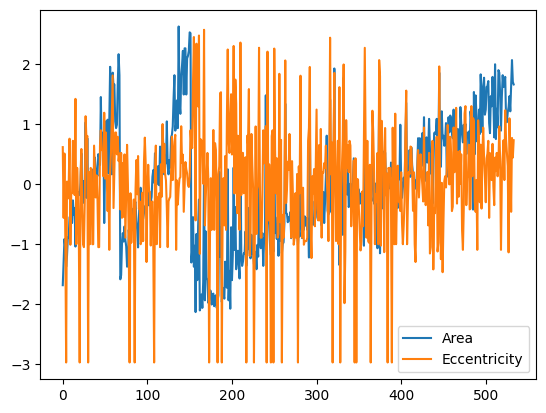

In [10]:
# your code here
normalized_data[["Area", "Eccentricity"]].plot()

## 5. Formating and splitting data to train the classifier

As we will be dealing with supervised machine learning algorithms, we want to be able to train the data on one dataset and test on a different one, this way we can avoid overfitting to our training data and hopefully get a more generalizable classifier.  
For this exercise, we will split our data into `train` and `test` sets in a 80/20 % fractions, respectively.

However, before splitting we should shuffle the data. We can do that by using [.sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) method with a few extra parameters, as follows: `data.sample(frac=1).reset_index(drop=True)`.
- By using `frac` (fraction) equal to 1 we get a randomized version of the dataset
- In addition, `pandas` dataframes keep the row indexes from the first column, so we need to reset them after shuffling with `.reset_index(drop=True)`.

To split the data, we need to know how many rows of our data go into each dataset. We can use [`.shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape) to get the number of rows.

Then we can split the dataframe using the [.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) operator and using normal python slicing. Example snipet: `data.loc[starting_index:ending_index, :].copy()`

---

Let's separate the normalized dataset into 80% for training and 20% for testing.

Step-by-step:
1. shuffle data before splitting
    - using `.sample` method
1. get the number of rows to estimate indexes of fractions
    - use `data.shape` to get the size and then estimate fractions
1. slice the dataset into `train` and `test` subsets
    - using the `.loc` method and array slicing

In [31]:
# your code here

normalized_data = normalized_data.sample(frac=1).reset_index(drop=True)

rows, cols = normalized_data.shape

train = normalized_data.loc[0:rows*0.8, :].copy()
test = normalized_data.loc[rows*0.8:, :].copy()

Let's print the shape of `data`, `train` and `test` to make sure everything went right

In [32]:
print(data.shape, train.shape, test.shape)

(534, 8) (428, 8) (106, 8)


Next step is to separate both the training and testing datasets into features (`X`) and labels (`y`).   
We will also take the opportunity to convert the data from a pandas Dataframe to numpy arrays by using the pandas method [`.to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html)   
Let's do that by creating new variables with the corresponding columns:
```python
X_train = train[["Column_name_1", "Column_name_2"]].to_numpy()
y_train = train["Column_name_3"].to_numpy()

X_test = test[["Column_name_1", "Column_name_2"]].to_numpy()
y_train = test["Column_name_3"].to_numpy()
```


In [40]:
# your code here
columns_list = ['Area', 'Perimeter', 'Length', 'Width', 'Eccentricity','Irregularity']
X_train = train[columns_list].to_numpy()
y_train = train["Cell Cycle Phase"].to_numpy()

X_test = test[columns_list].to_numpy()
y_test = test["Cell Cycle Phase"].to_numpy()

__Bonus__:

Use array slicing and reverse indexes to get column names for features (`X`) and labels (`y`).

_Note_: you have to exclude the first ("Cell ID") and last ("Cell Cycle Phase") columns from the features.

In [46]:
# your code here
columns_list = data.columns
X_train = train[columns_list[1:-1]].to_numpy()
y_train = train[columns_list[-1]].to_numpy()

X_test = test[columns_list[1:-1]].to_numpy()
y_test = test[columns_list[-1]].to_numpy()

## 6. Training a simple Logistic Regression model for the automatic classification task

[`LogisticRegression`](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) is part of the `linear_model` module of scikit-learn.

Remember that all scikit-learn models have roughly the same API so we do the following:
```python
from sklearn.model_module import Model
model = Model()
model.fit(X_data2train, y_data2train)
output = model.predict(data2predict)
```
---

Step-by-step:
1. Initialize the classifier
2. Train it using the `X_train` and `y_train`
3. Perform the predictions on `X_test`


In [14]:
# your code here
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

Now it's time to evaluate the quality of the predictions.  
We can start by just measuring the accuracy of the model:
```python
accuracy = np.sum(predictions == y_test) / predictions.shape[0]
```

The code above will create an array filled with True for the cases where the prediction was the same class as the true labels. `.sum` allows us to "count" the total number of True values and then by dividing with the total number we get an accuracy value.

Note: don't forget to import numpy

In [15]:
# your code here
accuracy = sum(predictions == y_test) / predictions.shape[0]
print(accuracy)

0.5660377358490566


So now we now the rough accuracy of the model, but accuracy is a crappy metric...  
For example, we don't know when and why the model is failing.  
A better way to evaluate the quality of the trained model is to create a confusion matrix:  
<img src="https://cdn.prod.website-files.com/660ef16a9e0687d9cc27474a/662c42677529a0f4e97e4f96_644aea65cefe35380f198a5a_class_guide_cm08.png" width=400>

---

We can do this by using the module [`metrics`](https://scikit-learn.org/1.5/api/sklearn.metrics.html) from scikit-learn.
We generate it using `confusion_matrix` and will display it using `ConfusionMatrixDisplay`:

```python
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

our_confusion_matrix = confusion_matrix(testing_data, predition_results, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=our_confusion_matrix).plot()
```

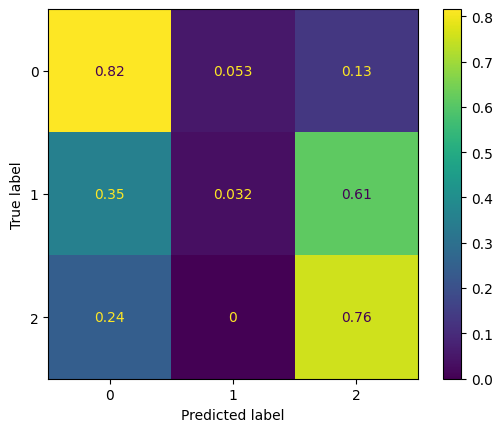

In [16]:
# your code here
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test,predictions,normalize='true')
ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()

From the confusion matrix we can calculate better metrics than just accuracy.   
<img src="https://www.kdnuggets.com/wp-content/uploads/selvaraj_confusion_matrix_precision_recall_explained_12.png" width=400>
   
---

Let's use the [`precision_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) function from scikit-learn to calculate the precision of our model.
```python
from sklearn.metrics import precision_score

our_score = precision_score(testing_data, prediction_results, average="macro") # average=macro makes it so that we calculate the precision per class and then averages the precision of all labels
print(our_score)
```


In [19]:
# your code here
from sklearn.metrics import precision_score

precision = precision_score(y_test,predictions, average="macro")
print(precision)

0.49321266968325794


## 7. Improving the model
The current model is not really great, one common cause of poor performance is class imbalance. This happens when classes are not well represented during training and a classifier will not be able to learn their features accurately. Which may cause them to be mislabeled.

Let's plot the histogram of the classes in `y_train` using [`.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) from matplotlib:

```python
from matplotlib import pyplot as plt
plt.hist(y_train)
```

(array([38.,  0.,  0.,  0.,  0., 31.,  0.,  0.,  0., 37.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

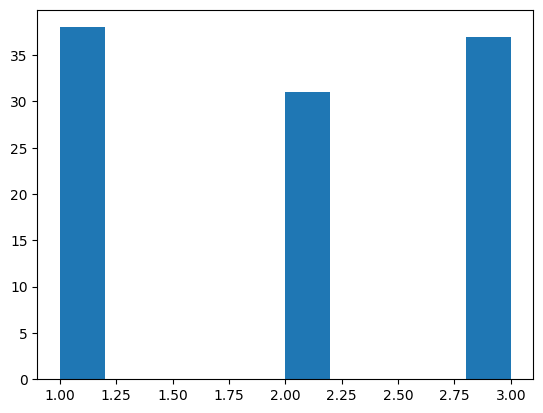

In [23]:
# your code here
from matplotlib import pyplot as plt
plt.hist(y_test)

__Bonus question__:

Why can't we just do `y_train.hist()` as we did before? Now we have to import `matplotlib` to do the histogram.

---

Class imbalance can be countered by giving higher weight to less represented classes.

Thankfully scikit-learn models accept a `class_weight` argument that can be set to `"balanced"` in order to address class imbalance.   
Let's re-train our `LogisticRegression` model using `class_weight="balanced"` and see if that improves the model.

---

Step-by-step:
1. Initialize the classifier
2. Train it using the `X_train` and `y_train`
3. Perform the predictions on `X_test`
4. Plot the confusion matrix
5. Calculate precision

0.607633973710819


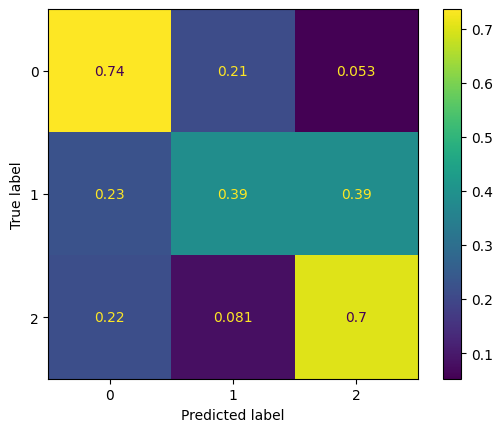

In [24]:
# your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

classifier = LogisticRegression(class_weight="balanced")
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

conf_mat = confusion_matrix(y_test,predictions,normalize='true')
ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()

precision = precision_score(y_test,predictions, average="macro")
print(precision)

## 8. Cross-validation
Although the model seems to have improved, there is the risk of over-fitting to our training data split.

To avoid that, we can use cross-validation.   
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width=400>   


Cross-validation is a technique used to evaluate the performance of a machine learning model by splitting the dataset into multiple subsets or "folds".   
The model is trained on some of these subsets and tested on the remaining ones, ensuring that each subset is used as a test set at least once. The most common form, k-fold cross-validation, divides the data into $k$ equal parts, trains the model on $k-1$ parts, and tests it on the remaining one.   
This process is repeated $k$ times, with a different fold being used for testing each time. Cross-validation helps assess how well a model generalizes to unseen data and reduces the risk of overfitting.

---

We can perform this using the [`model_selection`](https://scikit-learn.org/dev/api/sklearn.model_selection.html) module of scikit-learn.   
In there we can find [`ShuffleSplit`](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit) that can create multiple folds of our data.   
And we can use the [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) function to evaluate the model on those folds.   

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit, cross_val_score

our_classifier = LogisticRegression(class_weight="balanced")
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
scores = cross_val_score(our_classifier, training_data, training_labels, cv=cv,scoring='average_precision')
print(scores)
```


In [27]:
# your code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit, cross_val_score

classifier = LogisticRegression(class_weight="balanced")
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

scores = cross_val_score(classifier, X_train, y_train, cv=cv,scoring='average_precision')
print(scores)

[0.50494062 0.54521389 0.55400894 0.50266326 0.5732263 ]


## 9. Let's try using a Random Forest Classifier

Use `ShuffleSplit` and `cross_val_score` to see if we can achieve a better accuracy.

Remember that all scikit-learn models have roughly the same API so we do the following:
```python
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(class_wieight="balanced")
# use the code from the previously cell to calculate the scores
```


In [28]:
# your code here
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(class_weight="balanced")

scores = cross_val_score(classifier, X_train, y_train, cv=cv,scoring='average_precision')
print(scores)

[0.52931988 0.54139103 0.54548969 0.52313368 0.55533383]


## 10. Fine-tuning the Random Forest Classifier   
Random Forest Classifier accepts several parameters, including the number of trees in the forest, the number of features to consider when looking for the best split, and the maximum depth of the trees.
```python
classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
```
---

This can be cumbersome when done manually, so let's do a parameter sweep to optimize our classifier.
We can use sklearn [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) to find the best parameters for our model.
   
After fitting we can get the best parameters from the grid search.


```python
from sklearn.model_selection import GridSearchCV

param_1_values = [1, 5, 10, 15, 20]
param_2_values = [10, 50, 100, 150, 200]
param_3_values = [1, 2, 3, 4, 5]

parameters = {
    "param_1": param_1_values,
    "param_2": param_2_values,
    "param_3": param_3_values
}

parameter_sweep = GridSearchCV(our_classifier, parameters, cv=cv, scoring="average_precision")
parameter_sweep.fit(X_train, y_train)
print(parameter_sweep.best_params_)
```

In [29]:
# your code here
from sklearn.model_selection import GridSearchCV

max_depth_values = [1, 5, 10, 15, 20]
n_estimators_values = [10, 50, 100, 150, 200]
max_features_values = [1, 2, 3, 4, 5]

parameters = {
    "max_depth": max_depth_values,
    "n_estimators": n_estimators_values,
    "max_features": max_features_values
}

parameter_sweep = GridSearchCV(classifier, parameters, cv=cv, scoring="average_precision")
parameter_sweep.fit(X_train, y_train)
print(parameter_sweep.best_params_)


{'max_depth': 5, 'max_features': 5, 'n_estimators': 10}


## 11. (Bonus) Try to further fine tune the model or try a different model from scikit-learn
A list of scikit-learn models can be found [here](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

In [85]:
# your code here